# Clase 14: Introducción al Aprendizaje Supervisado


**MDS7202: Laboratorio de Programación Científica para Ciencia de Datos**

**Profesor: Ignacio Meza De la jara**

## Objetivos: 
   
- Introducirlos en el aprendizaje supervisado usando ejemplos aplicados.
- Entender el framework de clasificación y la ingeniería de características.
- Ver las métricas de evaluación más comunes.
- Entender conceptos relacionados con el entrenamiento de un modelo de machine learninig.


## Panorama General Hasta el Momento

<div align='center'>
<img src='https://github.com/MDS7202/MDS7202/blob/main/recursos/2023-01/18-Aprendizaje-Supervisado-I/etapas.png?raw=true'/>
</div>

---

<br>

<div align='center'>
<img src="https://github.com/MDS7202/MDS7202/blob/main/recursos/2023-01/18-Aprendizaje-Supervisado-I/machine_learning.png?raw=true" alt="Panorama General ML: Clasificación supervisada, No supervisada y Aprendizaje Reforzado binario" width=700/>
</div>


## Aprendizaje Supervisado

En aprendizaje supervisado se basa en trabajar con datasets cuyas observaciones son conjuntos de vectores con distintas **características** que describen a algún objeto más una **etiqueta/valor real** la cuál asigna una clase o valor a cada objeto. 

Cuando el valor a predecir es un(a): 

- Categoría/Etiqueta, el problema que se resuelve se denomina **Clasificación**.
- Valor real, el problema que se resuelve se denomina **Regresión**.


Las etiquetas pertenecen a un número finito de clases.


Por ejemplo, el caso que estemos describiendo a una persona, el vector puede contener las siguentes **features/características**:

- su altura en cm, 
- edad, 
- peso en kg, 
- residencia, 
- etc...

Mientras que la **etiqueta** puede ser si la persona *quiere o no contratar un servicio de internet*: $\{ True, False\}$ 

In [41]:
import pandas as pd

# ejemplo clasificación
pd.DataFrame(
    [[177, 43, 72, "Maipú", True], [160, 16, 60, "Pudahuel", False]],
    columns=["Altura", "Edad", "Peso", "Residencia", "Posible cliente?"],
)

,Altura,Edad,Peso,Residencia,Posible cliente?
0,177,43,72,Maipú,True
1,160,16,60,Pudahuel,False


Como también lo que está dispuesto a gastar en el plan.

In [2]:
# ejemplo regresión
pd.DataFrame(
    [[177, 43, 72, "Maipú", 55000], [160, 16, 60, "Pudahuel", 0]],
    columns=["Altura", "Edad", "Peso", "Residencia", "Cuánto está dispuesto a pagar?"],
)

,Altura,Edad,Peso,Residencia,Cuánto está dispuesto a pagar?
0,177,43,72,Maipú,55000
1,160,16,60,Pudahuel,0


El objetivo final del aprendizaje supervisado es crear modelos que permiten **asignar de forma automática categorías o valores a observaciones nuevas**. 

En términos prácticos, dado una nueva observación representada por un vector de características, el modelo generado debe ser capaz de asignar una etiqueta a dicha observación.


### Framework General de Aprendizaje Supervisado Clásico

La siguiente lista muestra las etapas que debería cumplir un algoritmo de aprendizaje supervisado clásico (i.e., no red neuronal)

1. **Feature Engineering y Preprocesamiento**: Recolectar y preparar los datos.
2. **Entrenar** un algoritmo de clasificación/regresión usando los datos.
3. **Evaluar** qué tan bien clasifica el modelo generado.
4. **Optimizar los modelos** modificando sus hiperparámetros.



El modelo construido debe **generalizar**, es decir, debe ser capaz de realizar predicciones correctas en nuevas observaciones. Para esto es útil pensar que el modelo generado está separando los datos por clases a través de un *decision boundary*. Mientras más holgado sea este *decision boundary*, mejor podrá generalizar el modelo.

<div align='center'>
<img src='https://github.com/MDS7202/MDS7202/blob/main/recursos/2023-01/18-Aprendizaje-Supervisado-I/overfitting.png?raw=true' witdh=400/>

</div>

<div align='center'>
<a href='https://www.researchgate.net/figure/Example-of-overfitting-in-classification-a-Decision-boundary-that-best-fits-training_fig1_349186066'>Ejemplo de *Overfitting* en researchgate</a>
</div>
    
<br/>
 
### Cómo determinar que algorimo utilizar 
 
Lo más importante es la **capacidad predictiva** del modelo.
Sin embargo, también hay otros factores muy relevantes que determinarán que algoritmo predictivo utilizar: 

**Eficiencia**: 
  - ¿Qué tanto se está demorando mi modelo en entrenar? 
  - ¿Y en predecir? 
  - ¿Es eficiente en memoria? 
  - ¿Debe almacenar el dataset de entrenamiento para funcionar?
  - ¿Es posible usarlo en tiempo real para algún tipo de solución online?
  
**Número de Features y Ejemplos Requeridos**: 
  - ¿Cuántos datos o features son requeridos para entrenar el modelo?
  - ¿Es compatible con la cantidad que dispongo?
  - ¿El tipo de features (i.e., categorícas, numéricas, combinación de ambas, etc...) es compatible con el algoritmo?
  
**Explicabilidad**: 
  - ¿Puedo explicar por qué el modelo está clasificando/regresionando de la manera que lo hace? 
  
***Fairness***: 
  - ¿Mi modelo es injusto con respecto a algún grupo social?


### ¿Cómo saber si un modelo es bueno o no?

Resumimos la capacidad predictiva de un modelo mediante **métricas de desempeño** (performance metrics).

Las métricas se calculan contrastando los valores predichos versus los valores reales de la variable objetivo (con datos no usados durante entrenamiento)

##  Matriz de Confusión

<div align='center'>
    <img src="https://github.com/MDS7202/MDS7202/blob/main/recursos/2023-01/18-Aprendizaje-Supervisado-I/matriz_conf.PNG?raw=true" alt="Ejemplo de una matriz de confusión para un problema de clasificación binario" width=450/>
</div>

<center>Ejemplo de una matriz de confusión para un problema de clasificación binario.</center>



---

> Ejemplo: Alergia a cierto medicamento en donde la clase `+` indica alergia.


Nuestro dataset tiene 10.000 observaciones distribuidos de la siguiente forma:

- Clase `+`: 100 observaciones.
- Clase `-`: 9900 observaciones.


Luego, creamos un modelo que clasificó nuestro dataset y graficamos sus resultados a través de la siguiente matriz de confusión:


|                    | **Predicha (`+`)**  | **Predicha (`-`)** |
|--------------------|---------------------|--------------------|
| **Real (`+`)**     | 10                  | 90                 |
| **Real (`-`)**     | 100                 | 9800               |

---

> **Pregunta**: ¿Cuales métricas de desempeño conocen para evaluar este caso?

### Métricas de desempeño

Métricas basadas en contar datos correcta e incorrectamente clasificados:

- **Accuracy (Exactitud)**: $$\text{accuracy} = \frac{\text{número de predicciones correctas}}{\text{número de predicciones totales}}$$

- **Error rate (Tasa de error)**: $$\text{error rate} = \frac{\text{número de predicciones incorrectas}}{\text{número de predicciones totales}}$$



- En nuestro ejemplo anterior: 

$$\text{accuracy} = \frac{9810}{10000} = 0.981$$

$$\text{error rate} = \frac{190}{10000} = 0.019$$


> **Pregunta ❓:** ¿Cuál es el problema de `Accuracy` en nuestro ejemplo?



---


#### Métricas Basadas en la Matriz de Confusión

Una posible solución a este problema son las métricas basadas en la matriz de confusión:

<div align='center'>
    <img src="https://github.com/MDS7202/MDS7202/blob/main/recursos/2023-01/18-Aprendizaje-Supervisado-I/matriz_conf.PNG?raw=true" alt="Ejemplo de una matriz de confusión para un problema de clasificación binario" width=450/>
</div>

- **Precision**:  Fracción de ejemplos correctamente predichos como `+` con respecto a todos los predichos `+`.

$$P = \frac{\text{Clasificados correctamente como positivo}}{\text{Todos los predichos como positivos}} =\frac{TP}{(TP + FP)}$$


<br>

- **Recall**: Fracción de ejemplos `+` que son correctamente clasificados: 

$$R = \frac{\text{Clasificados correctamente como positivo}}{\text{Todos los que debería haber clasificado como positivos}}  = \frac{TP}{(TP+FN)}$$


<br>

- **F1 measure**: Combina precisión y recall usando una media armónica (i.e., media que castiga si ambos valores son muy diferentes).

$$F = \frac{2PR}{(P+R)}$$



|                    | **Predicha (`+`)**  | **Predicha (`-`)** |
|--------------------|---------------------|--------------------|
| **Real (`+`)**     | 10                  | 90                 |
| **Real (`-`)**     | 100                 | 9800               |

En nuestro ejemplo anterior:


$$P = \frac{10}{110} = 0.\bar{09}$$

$$R = \frac{10}{100} = 0.1$$

$$F = \frac{2 \cdot 0.1 \cdot 0.\bar{1}}{(0.1 + 0.\bar{1})} \approx 0.095$$ 

Ahora claramente se nota el problema.

In [3]:
p = 10 / 110
r = 10 / 100

f = 2 * p * r / (p + r)
f

0.09523809523809525

> **Pregunta ❓**: En el caso de un problema de detección de frutas podridas, ¿que nos convendría más utilizar? ¿precision o recall? 

![](https://www.lavanguardia.com/files/article_main_microformat/uploads/2019/11/05/5e9979d2bdba1.jpeg)

> **Pregunta ❓**: Para el caso de un trader, ¿que nos convendría más utilizar? ¿precision o recall?


![](https://images.ctfassets.net/hzjmpv1aaorq/5HXWEnXDdy2ApxJmxatZ8D/ae24852a60c791fae04c21d9bf0046f2/US_100__15_.jpg?q=70)

#### Matriz de confusión multiclase

Cuando tenemos $k$ clases, la matriz de confusión es una matriz de $k \times k$.

<div align='center'>
<img src="https://github.com/MDS7202/MDS7202/blob/main/recursos/2023-01/18-Aprendizaje-Supervisado-I/matriz_conf_multiclase.png?raw=true" alt="Ejemplo de una matriz de confusión para un problema de clasificación binario" style="width: 500px;"/>
</div>

¿Cómo calculamos las métricas?


#### Métricas de Desempeño Generalizadas: 


- Precision: Fracción de ejemplos asignados a la clase `i` que son realmente de la clase `i`. Finalmente, es la fracción de casos en los que declaramos correctamente 𝑖 de todos los casos en los que el algoritmo declaró 𝑖.

$$\text{precision} = \frac{c_{ii}}{\sum_{j}c_{ji}}$$


- Recall: Fracción de ejemplos de la clase `i` correctamente clasificados. Recall es la fracción de eventos en los que declaramos correctamente 𝑖 de todos los casos en los que el verdadero estado 𝑖: 

$$\text{recall} = \frac{c_{ii}}{\sum_{j}c_{ij}}$$

- Accuracy: Fracción de ejemplos correctamente clasificados:

$$\text{accuracy} = \frac{\sum_{i}c_{ii}}{\sum_{j}\sum_{i}c_{ij}}$$

#### Estrategia de Agregación

- **Macroaveraging**
    - Computar métrica para cada clase y luego promediar. 
    - Sobrerepresentan clases minoritarias al tratar a todas por igual.

- **Weighted**
    - Computar métrica para cada clase y luego hace un promedio ponderado por el número de ejemplos de esa clase.
    - Al ser ponderado por el número de casos, da más prioridad a las clases frecuentes.


`Scikit` provee un acceso rápido a todas estas métricas a través de su función `sklearn.metrics.classification_report`

### Underfitting y Overfitting

Errores de entrenamiento o **Underfitting**. 
- Malos resultados sobre los datos de entrenamiento
- El clasificador no tiene capacidad de aprender el patrón.

Errores de generalización o **Overfitting**. 
- Malos resultados sobre datos nuevos 
- El modelo se hace demasiado específico a los datos de entrenamiento. 


<div align='center'>
<img src='https://github.com/MDS7202/MDS7202/blob/main/recursos/2023-01/18-Aprendizaje-Supervisado-I/tipos_fit.png?raw=true' width=800/>
</div>

<div align='center'>
    Fuente: The Hundred-Page Machine Learning Book.
</div>

## Nuestro problema de hoy: Pingüinos  🐧


Origen del dataset:

**Palmer Archipelago (Antarctica) penguin data**: 

*Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.*

https://github.com/allisonhorst/palmerpenguins

![Pinguinos](https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/man/figures/lter_penguins.png)


    
    


### Atributos
 
- `culmen_length_mm`: Largo del culmen (vértice o borde superior de la mandíbula)  (mm).
- `culmen_depth_mm`: Alto del culmen (vértice o borde superior de la mandíbula) (mm).
- `flipper_length_mm`: Longitud de las aletas (mm).
- `body_mass_g`: Masa corporal (g).
- `island`: Isla de origen (Dream, Torgersen, or Biscoe) en el archipiélago de Palmer (Antarctica).
- `sex`: Sexo del pinguino.

![Detalle Variables](https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png)
    
<center>Créditos a Allison Horst por sus excelentes ilustraciones https://github.com/allisonhorst </center>    
    
    
### Variable a predecir

- `species`: Especie del pinguino (Chinstrap, Adélie, or Gentoo)

### Exploración y Preprocesamiento


In [42]:
# Instalar graphviz para visualizar el árbol generado
# Deben instalar antes graphviz: https://www.graphviz.org/download/

import sys

!pip install graphviz

In [43]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

In [44]:
df = pd.read_csv("/Users/imezadelajara/Repositories/MDS7202/recursos/2023-01/18-Aprendizaje-Supervisado-I/penguins.csv").dropna().reset_index(drop=True)
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
329,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
330,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
331,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
332,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


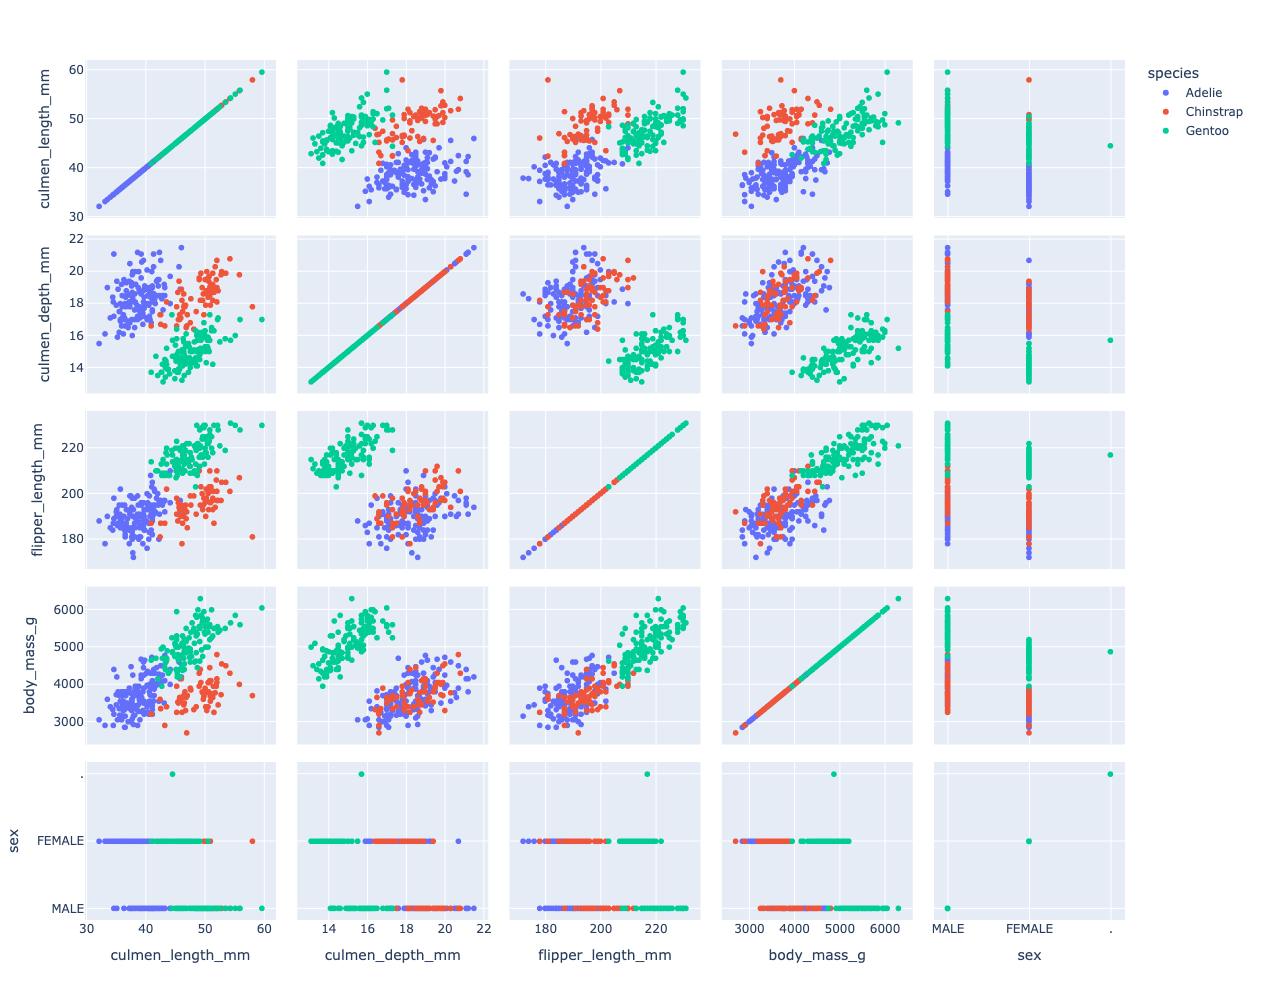

In [46]:
import plotly.express as px

fig = px.scatter_matrix(
    df, dimensions=df.iloc[:, 2:].columns, color="species", height=1000
)
fig.show()

## Holdout

Consiste en particionar nuestro dataset en conjuntos de:

- **Training**: conjunto que se utiliza para **entrenar** el modelo.
- **Testing**: datos que se usa para **evaluar** qué tan bien predice el modelo (a través de las métricas de evaluación). 


Comunmente se dividen en proporción $2/3$ y $1/3$ del dataset respectivamente. Sin embargo, todo depende de la cantidad de datos que se posean: si se tiene millones de ejemplos, quizas puede dividirse en 95% train, 5% test sin problemas. 


La evaluación puede variar mucho según las particiones escogidas: 

- Training pequeño -> modelo sesgado, 
- Testing pequeño -> evaluación poco confiable.


Esta ténica se puede **Random Subsampling** para seleccionar aleatoriamente las observaciones de cada uno de estos conjuntos.

Para ejecutar todo esto usaremos `train_test_split`. Veamos algunos de sus parámetros:

- `test_size = 0.33` - indica el tamaño del test de evaluación.
- `shuffle = True` - indica que ejecutaremos Random Subsampling.
- `stratify = labels` - intenta manetener la distribución de clases original en ambos conjuntos.

### Validation set:

Cuando se desea realizar una búsqueda de los mejores algoritmos y sus hiperparámetros, el dataset puede ser dividido en 3:


- **Training**: Se utiliza para entrenar los modelos.
- **Validation**: Se utiliza para seleccionar el mejor modelo al ir variando sus hiperparámetros.
- **Testing**: Se utiliza para evaluar el modelo previo a ser entregado o puesto en producción. Esta evaluación solo se hace sobre el modelo final.


En este caso la división puede ser $70\%, 15\%, 15\%$ respectivamente.

In [47]:
# Holdout
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

features = df.drop(columns=["species"])
labels = df.loc[:, "species"]


X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.33, shuffle=True, stratify=labels, random_state=42
)

In [48]:
X_train

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
277,Biscoe,45.8,14.2,219.0,4700.0,FEMALE
77,Torgersen,35.1,19.4,193.0,4200.0,MALE
150,Dream,52.7,19.8,197.0,3725.0,MALE
192,Dream,50.1,17.9,190.0,3400.0,FEMALE
258,Biscoe,43.6,13.9,217.0,4900.0,FEMALE
...,...,...,...,...,...,...
38,Dream,44.1,19.7,196.0,4400.0,MALE
9,Torgersen,34.6,21.1,198.0,4400.0,MALE
96,Biscoe,37.7,16.0,183.0,3075.0,FEMALE
265,Biscoe,45.1,14.4,210.0,4400.0,FEMALE


In [49]:
X_train.shape

(223, 6)

In [11]:
X_test.shape

(111, 6)

In [50]:
# distribución original
labels.value_counts() / labels.count() * 100

Adelie       43.712575
Gentoo       35.928144
Chinstrap    20.359281
Name: species, dtype: float64

In [51]:
# conjunto de entrenamiento
y_train.value_counts() / y_train.count() * 100

Adelie       43.946188
Gentoo       35.874439
Chinstrap    20.179372
Name: species, dtype: float64

In [52]:
# conjunto de pruebas
y_test.value_counts() / y_test.count() * 100

Adelie       43.243243
Gentoo       36.036036
Chinstrap    20.720721
Name: species, dtype: float64

## `cross-validation`

Cross-validation es una técnica para evaluar el grado de generalización de un modelo en un conjunto de datos independiente. Es especialmente útil para conjuntos de datos pequeños, en los que cada punto de datos es valioso tanto para el entrenamiento como para la validación. El proceso consiste en dividir el conjunto de datos en varias partes, utilizar algunas para entrenar el modelo y el resto para probarlo, y repetir este proceso varias veces para garantizar una evaluación completa.

Aunque normalmente se utiliza para la selección de modelos y la estimación del rendimiento, la validación cruzada también puede proporcionar información sobre la estabilidad y la incertidumbre de las predicciones de su modelo. Al examinar la variación de las métricas de rendimiento (p. ej., precisión, RMSE), puede evaluar la coherencia del rendimiento de los modelos en diferentes subconjuntos de datos.

---
    Para cada partición i:
        - Juntar todas las k-1 particiones restantes y entrenar el modelo sobre esos datos.
        - Evaluar el modelo en la partición i.
        
    El error total = suma de errores de todos los modelos  

---

<img src='https://github.com/MDS7202/MDS7202/blob/main/recursos/2023-01/18-Aprendizaje-Supervisado-I/kfold.png?raw=true' width=400>

In [53]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler

ct = ColumnTransformer(
    [
        (
            "Scaler",
            RobustScaler(),
            [
                "culmen_length_mm",
                "culmen_depth_mm",
                "flipper_length_mm",
                "body_mass_g",
            ],
        ),
        ("OneHot", OneHotEncoder(sparse_output=False, handle_unknown='infrequent_if_exist'), ["island", "sex"]),
    ]
)

<center>
<img src='https://amueller.github.io/aml/_images/stratified_cv.png' width=300 />


In [56]:
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

# Realizamos transformaciones pertinentes
X_train_cv = ct.fit_transform(X_train)
cols_trans_name = ct.get_feature_names_out()
X_train_cv = pd.DataFrame(X_train_cv, columns=cols_trans_name)

cv = StratifiedKFold(n_splits=7)
scores = {'acc': [], 'f1': []}

for train_index, test_index in cv.split(X_train_cv, y_train):
    X_train_fold, X_test_fold = X_train_cv.iloc[train_index], X_train_cv.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # Entrenamos el modelo
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train_fold, y_train_fold)

    # Evaluamos el modelo
    y_pred_fold = model.predict(X_test_fold)
    acc_score = accuracy_score(y_test_fold, y_pred_fold)
    f_score = f1_score(y_test_fold, y_pred_fold, average="macro")
    scores['acc'].append(acc_score)
    scores['f1'].append(f_score)

In [58]:
# Hagamos una tabla delos resultados
results = pd.DataFrame.from_dict(scores)
mean_col = pd.DataFrame(results.mean()).T.rename(index={0:'mean'})
std_col = pd.DataFrame(results.std()).T.rename(index={0:'std'})
results = pd.concat([results,mean_col], axis=0)
results = pd.concat([results,std_col], axis=0)
results

,acc,f1
0,0.937500,0.920635
1,0.968750,0.958203
2,1.000000,1.000000
3,0.937500,0.928571
4,0.968750,0.965432
5,0.937500,0.938095
6,0.967742,0.962013
mean,0.959677,0.953279
std,0.023562,0.026888


> **Pregunta ❓**: ¿Qué podría pasar si nuestro modelo tiene una alta variación?

## ¿Qué problemas podríamos visualizar con Holdout?

> **Pregunta 1❓**: ¿Podría existir algún problema con el realizar un feature engineering en el siguiente conjunto de datos?

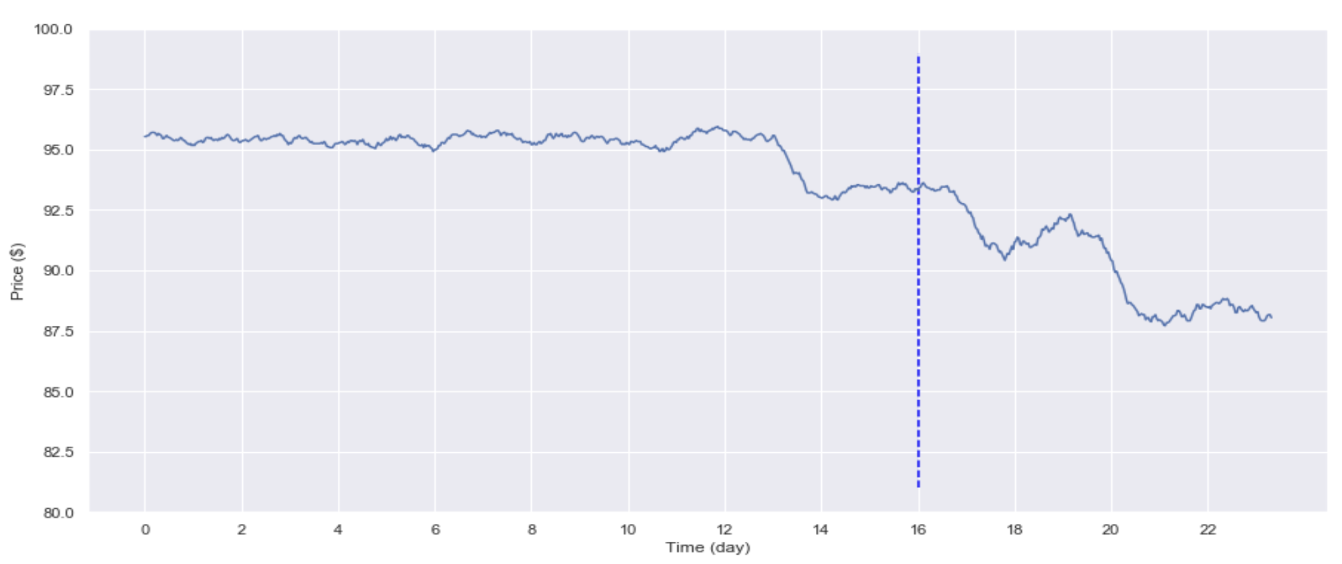

> **Pregunta 2❓**: ¿Qué problema podría tener el siguiente escenario?

<center>
<img src="https://i.ytimg.com/vi/QB6-j4nJk1Q/maxresdefault.jpg" width=300 />

Imaginemos que queremos detectar cáncer de pulmón a partir de visualizaciones obtenidas con diversos escáneres. Nuestro equipo de recopilación de datos ha extraído información de dos hospitales y hemos desarrollado un algoritmo afinado para detectar una anomalía específica. Sin embargo, nos enfrentamos a los siguientes problemas con nuestro algoritmo:

- Rendimiento adecuado con los datos de prueba del hospital A.
- Rendimiento deficiente con los datos de prueba del hospital B.

Las columnas son las siguientes:

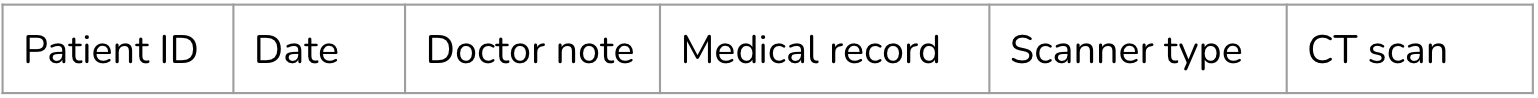

### Preprocesamiento y Data Leakage

<center>
<img src='https://media1.giphy.com/media/lVBtp4SRW6rvDHf1b6/200w.gif?cid=6c09b952a7zf3h2d55w0f4w0qwqam42qbtojlgcpitpq4c8o&ep=v1_gifs_search&rid=200w.gif&ct=g' width=300 />

Data Leakage o fuga de datos se refiere al uso de datos de prueba dentro del entrenamiento de un modelo predictivo (lo que ovbiamente es incorrecto).

Dentro de los motivos por los cuales se podra generar data leakage, tenemos:

- **División aleatoria de datos correlacionados en el tiempo en lugar de por tiempo**: Se refiere a dividir datos que están correlacionados en el tiempo de manera aleatoria en lugar de hacerlo de forma cronológica. Esto puede causar problemas en la interpretación y evaluación del modelo.
  
- **Procesamiento de datos antes de la división**: Se refiere a la manipulación de los datos antes de dividirlos en conjuntos de entrenamiento y prueba. Es importante realizar cualquier procesamiento de datos, como normalización o codificación, después de dividir los datos para evitar fugas de información.
  
- **Manejo deficiente de la duplicación de datos antes de la división**: Indica que no se está manejando adecuadamente la duplicación de datos antes de dividirlos en conjuntos de entrenamiento y prueba. Esto puede introducir sesgos en el modelo y afectar su rendimiento.

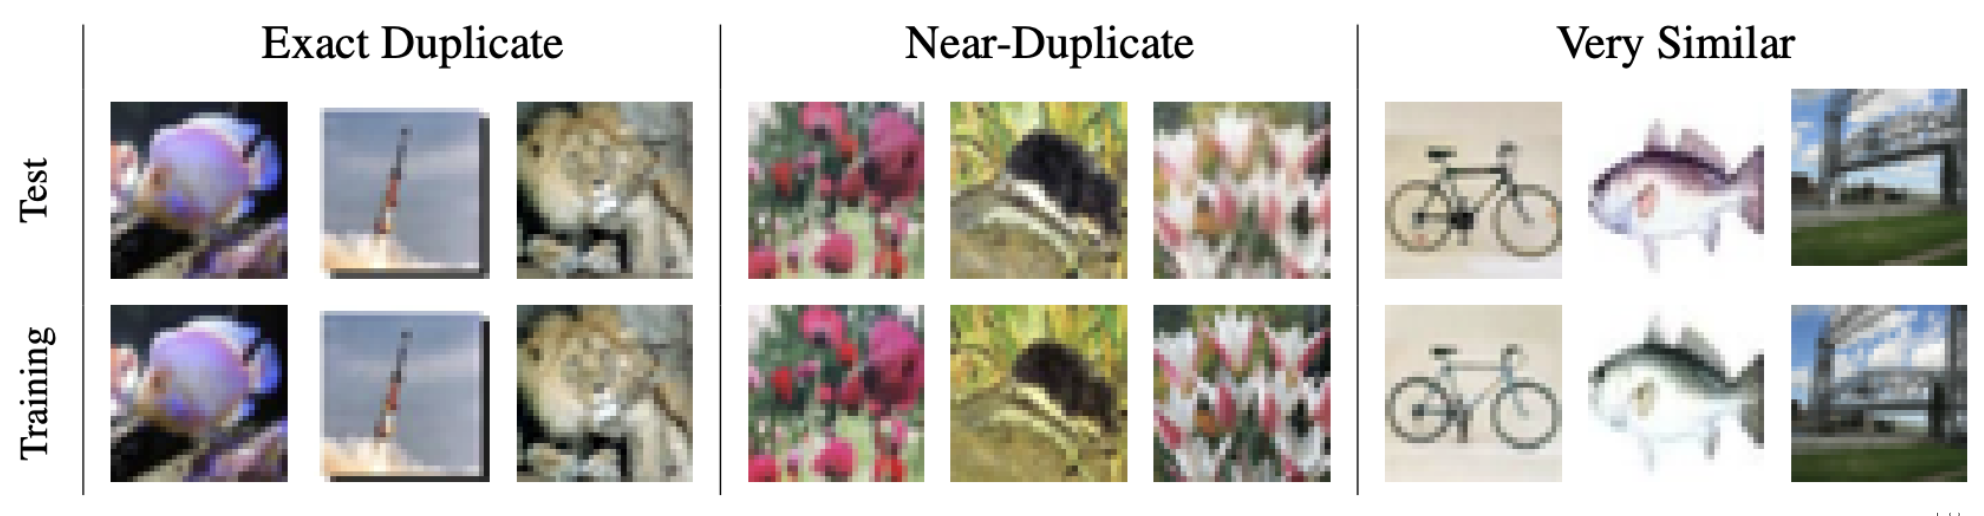
  
- **Fuga de grupo**: Se produce cuando la información de un grupo se filtra al conjunto de datos de entrenamiento o prueba, lo que puede llevar a una sobreestimación del rendimiento del modelo.
  
- **Fuga de la generación y recopilación de datos**: Ocurre cuando la información del proceso de generación o recopilación de datos se filtra al conjunto de datos de entrenamiento o prueba, lo que puede afectar negativamente la generalización del modelo.

Es muy importante que el **preprocesamiento y feature engineering lo hagan siempre sobre los datos de entrenamiento y no sobre todo el dataset**. De lo contrario, estarían ocupando datos destinados a evaluar para entrenar el modelo (o el preprocesamiento) lo que puede inducir a resultados muy buenos cuando en verdad no deberían serlos.

Mas información en [data-leakage de scikit-learn](https://scikit-learn.org/stable/common_pitfalls.html#data-leakage)

In [60]:
X_train_preprocessed = pd.DataFrame(
    ct.fit_transform(X_train),
    columns=np.concatenate(
        [ct.transformers_[0][2], ct.transformers_[1][1].get_feature_names_out()], axis=0
    ),
)

#### Data Leakage, ¿donde?

1. **Medir la correlación de una features con las etiquetas** Una feature por sí sola puede que no cause filtración de datos, pero dos características juntas podrían.

2. **Estudio de ablación de features** Si la eliminación de una feature provoca una disminución significativa en el rendimiento del modelo, es importante averiguar por qué.

3. **Monitorear el rendimiento del modelo a medida que se añaden más features** Aumento repentino: ¡puede ser una característica muy buena o una filtración de datos!

**Retomemos el ejemplo anterior**

In [61]:
y_train

277       Gentoo
77        Adelie
150    Chinstrap
192    Chinstrap
258       Gentoo
         ...    
38        Adelie
9         Adelie
96        Adelie
265       Gentoo
64        Adelie
Name: species, Length: 223, dtype: object

In [62]:
import graphviz
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, export_graphviz

tree_pipe = Pipeline(
    [("preprocesamiento", ct), ("tree", DecisionTreeClassifier(criterion="entropy"))]
)

# noten que aquí se pasa X_train ya que la etapa de
# preprocesamiento está incluida en el pipeline (primera etapa)

tree_pipe = tree_pipe.fit(X_train, y_train)

In [63]:
y_pred = tree_pipe.predict(X_test)
y_pred

array(['Gentoo', 'Chinstrap', 'Gentoo', 'Chinstrap', 'Adelie',
       'Chinstrap', 'Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Adelie',
       'Adelie', 'Chinstrap', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Chinstrap',
       'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo',
       'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap',
       'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap', 'Adelie',
       'Chinstrap', 'Adelie', 'Chinstrap', 'Gentoo', 'Gentoo',
       'Chinstrap', 'Gentoo', 'Adelie', 'Gentoo', 'Chinstrap', 'Adelie',
       'Chinstrap', 'Adelie', 'Chinstrap', 'Adelie', 'Gentoo', 'Gentoo',
       'Chinstrap', 'Gentoo',

### Evaluación

In [64]:
print("Matriz de confusión\n\n", confusion_matrix(y_test, y_pred), "\n")
print(classification_report(y_test, y_pred))

Matriz de confusión

 [[45  3  0]
 [ 0 23  0]
 [ 1  1 38]] 

              precision    recall  f1-score   support

      Adelie       0.98      0.94      0.96        48
   Chinstrap       0.85      1.00      0.92        23
      Gentoo       1.00      0.95      0.97        40

    accuracy                           0.95       111
   macro avg       0.94      0.96      0.95       111
weighted avg       0.96      0.95      0.96       111



> **Pregunta❓**: ¿Cuando podemos decir que un modelo esta sobre-ajustado?

Imaginen que obtienen el siguiente caso:

- Train accuracy: 1 y Test accuracy: 0.6
- Train accuracy: 1 y Test accuracy: 1

### Learning Curves

<center>
<img src='https://media.tenor.com/cPX9p2z6fK8AAAAM/cerebrito-simpsons.gif' width=300 />

Una Learning Curve muestra la relación entre la puntuación de entrenamiento y la puntuación de prueba validada cruzadamente para un estimador con un número variable de muestras de entrenamiento. Esta visualización se utiliza típicamente para demostrar dos cosas:

1. Cuánto se beneficia el estimador a medida que posee más datos (por ejemplo, ¿tenemos "suficientes datos" o mejorará el estimador si se utiliza de manera online?).

2. Si el estimador es más sensible al error debido a la varianza versus el error debido al sesgo.

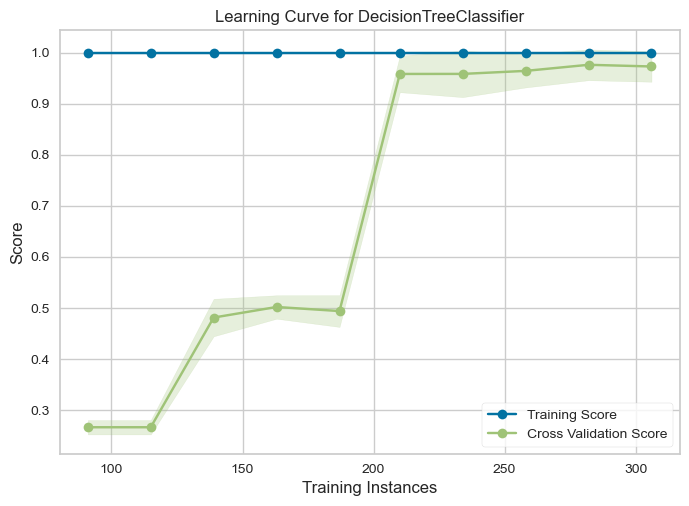

<Axes: title={'center': 'Learning Curve for DecisionTreeClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [22]:
import numpy as np
from yellowbrick.model_selection import LearningCurve

cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

visualizer = LearningCurve(
    tree_pipe, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
)

visualizer.fit(features, labels)
visualizer.show()

En sintesis, esto nos ayuda a:

1. **Optimización del tamaño del conjunto de datos:** Ayuda a determinar si el modelo se beneficiaría de más datos de entrenamiento o si ya ha alcanzado su límite de rendimiento con la cantidad actual de datos. Esto es crucial para evitar el sobreajuste o el subajuste del modelo.

2. **Diagnóstico de problemas de rendimiento:** Permite identificar si el modelo sufre principalmente de sesgo (underfitting) o de varianza (overfitting). Si la curva de aprendizaje indica un bajo rendimiento tanto en los datos de entrenamiento como en los de validación, es posible que el modelo necesite una mayor complejidad. Si la brecha entre las curvas de aprendizaje es grande, puede ser indicativo de sobreajuste.

3. **Toma de decisiones informadas:** Proporciona información valiosa para tomar decisiones sobre la arquitectura del modelo, la recopilación de datos adicionales o la necesidad de técnicas de regularización para mejorar el rendimiento del modelo.

### Importancia de Features

<center>
<img src='https://i.imgur.com/pYamhDO.gif' width=300 />

>  **Pregunta❓**: ¿Cuánto se deteriora el rendimiento del modelo si se elimina una feature o un conjunto de características que contienen esa feature del modelo?

La feature importance en machine learning es una medida que indica la contribución relativa de cada característica (o variable) en la predicción realizada por un modelo. En esencia, proporciona información sobre qué características son más influyentes para el modelo a la hora de hacer predicciones.

Esta medida es útil para entender qué variables están contribuyendo significativamente a la capacidad predictiva del modelo y puede ayudar en tareas como la selección de características, la interpretación del modelo y la identificación de características relevantes para un problema en particular.

Existen diferentes métodos para calcular la importancia de características, dependiendo del tipo de modelo utilizado. Algunos modelos proporcionan directamente esta información (como los árboles de decisión), mientras que en otros casos se pueden aplicar técnicas específicas, como la importancia de características basada en permutaciones o el uso de coeficientes en modelos lineales.

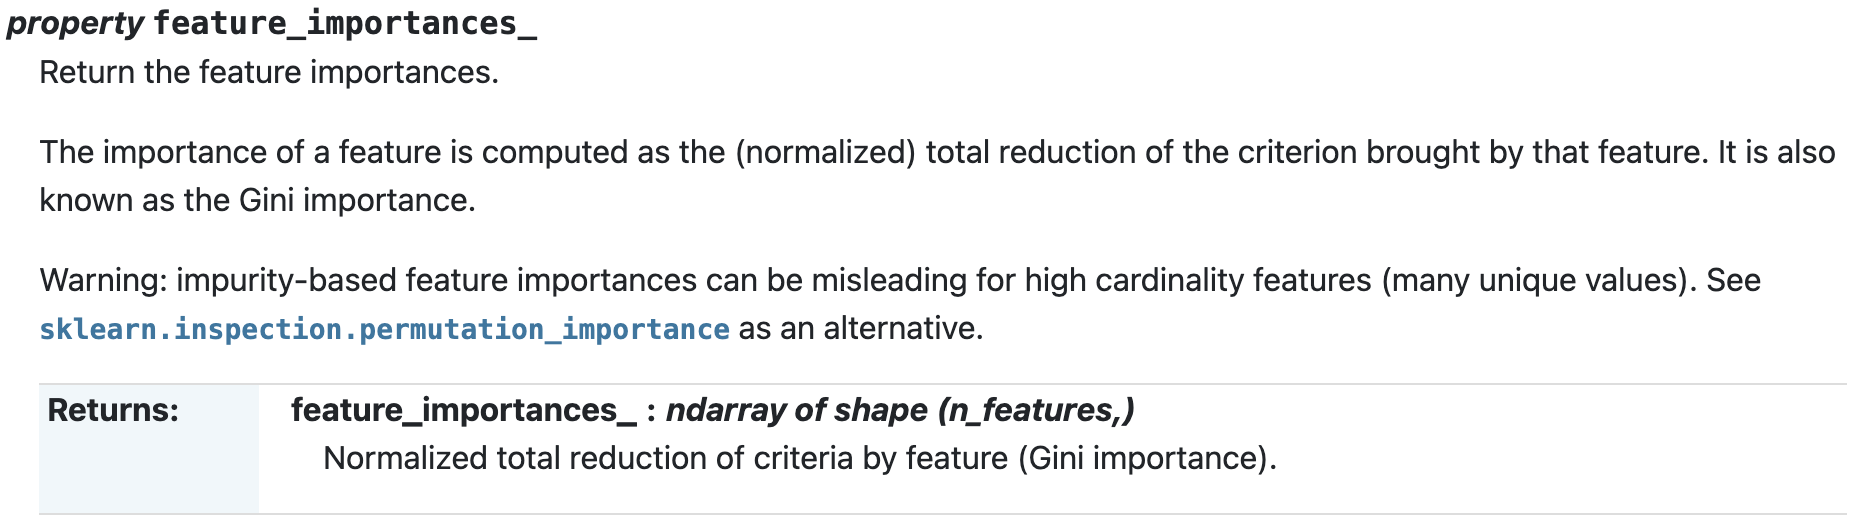

Veamos la importancia en nuestro árbol:

<Axes: >

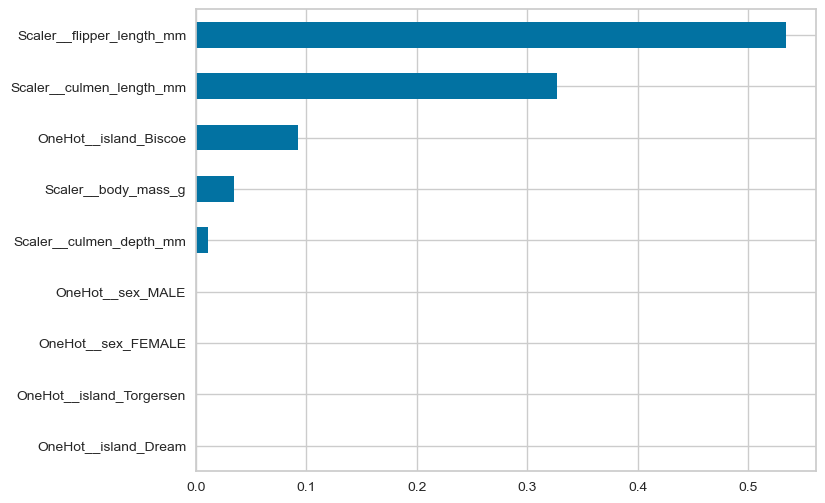

In [65]:
import matplotlib.pyplot as plt

columns_names = tree_pipe['preprocesamiento'].get_feature_names_out()
feat_importances = pd.DataFrame(
    tree_pipe['tree'].feature_importances_, 
    index=columns_names, 
    columns=["Importance"]
)
feat_importances.sort_values(by='Importance', ascending=True, inplace=True)
feat_importances.plot(kind='barh', figsize=(8,6), legend=False)

>  **Pregunta❓**: ¿Cómo podríamos sacarle provecho a esto?

In [66]:
import plotly.graph_objects as go
import numpy as np

def plot_line_std(x, y, std):
    # Crear una figura
    fig = go.Figure()

    # Añadir la línea principal
    fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='Main Line'))

    # Añadir la banda de variación o desviación estándar
    fig.add_trace(go.Scatter(x=np.concatenate([x, x[::-1]]),
                             y=np.concatenate([y - std, (y + std)[::-1]]),
                             fill='toself',
                             fillcolor='rgba(0,100,80,0.2)',
                             line=dict(color='rgba(255,255,255,0)'),
                             name='Variation'))

    # Establecer el diseño del gráfico
    fig.update_layout(title='Precisión del modelo con el número de features',
                      template='simple_white',
                      showlegend=False,
                      xaxis_title='Número de features',
                      yaxis_title='Score')

    # Mostrar el gráfico
    fig.show()

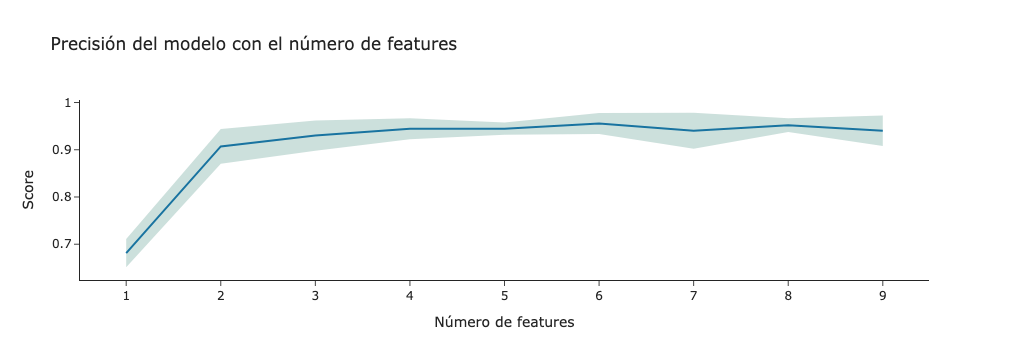

In [25]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Obtenemos X para el train para el ejemplo
array_X = tree_pipe['preprocesamiento'].fit_transform(X_train)
cols_trans_name = tree_pipe['preprocesamiento'].get_feature_names_out()
new_X_train = pd.DataFrame(array_X, columns=cols_trans_name)

# Lista para almacenar la precisión del modelo con cada número de características
precision_scores = []

# Crear un selector de características recursivo con validación cruzada
clf = tree_pipe['tree']

# Iterar sobre las características y evaluar el modelo con cada adición
for i in range(1, len(cols_trans_name) + 1):
    # Seleccionar las primeras i características
    selected_features = cols_trans_name[:i]
    scores = cross_val_score(
        clf, new_X_train[selected_features], 
        y_train, cv=5, scoring='precision_macro'
    )    
    # Almacenar la precisión del modelo con i características
    precision_scores.append(scores)

# Calcular variación de los puntos
x = [i for i in range(1, len(cols_trans_name) + 1)]
y = np.array(precision_scores).mean(axis=1)
std = np.array(precision_scores).std(axis=1)

plot_line_std(x, y, std)

>  **Pregunta❓**: ¿Por qué es necesaria la baja de dimensionalidad?

Entrenamiento:
1. Sobreajuste.
2. Más características, más oportunidades para fuga de datos inferencia.
3. Aumento de la latencia de inferencia con predicciones en línea.
4. Puede causar un aumento en el uso de memoria -> se requiere una instancia más cara.
5. Las features obsoletas se convierten en deudas técnicas.

### Calibración de Modelos

Sea \\(f: X \rightarrow Y\\), la clase predicha por \\(X\\) es dada por \\(\hat{Y}\\) y con una probabilidad \\(\hat{P} = f(X)\\). Se define que un modelo \\(f\\) esta perfectamente calibrado cuando \\(\forall p \in [0,1]\\),  \\(\mathbb{P}(\hat{Y}=Y | \hat{P}=p)=p\\)

<center>
<img src='https://miro.medium.com/v2/resize:fit:864/0*1tT_Ryn4f0I2IJ2b.png' width=800 />

Las salidas de un modelo calibrado siempre están entre 0 y 1, esto nos puede permitir interpretar los valores como probabilidades. ¿Pero de qué sucesos? Para cumplir la lectura frecuentista subyacente de esas puntuaciones, las muestras con probabilidad predicha p deben tener una frecuencia observada de pertenencia a la clase positiva que sea precisamente p. Bajo esta declaración, nuestras predicciones tendrían un porcentaje de seguridad hacía que clase pertenecen.

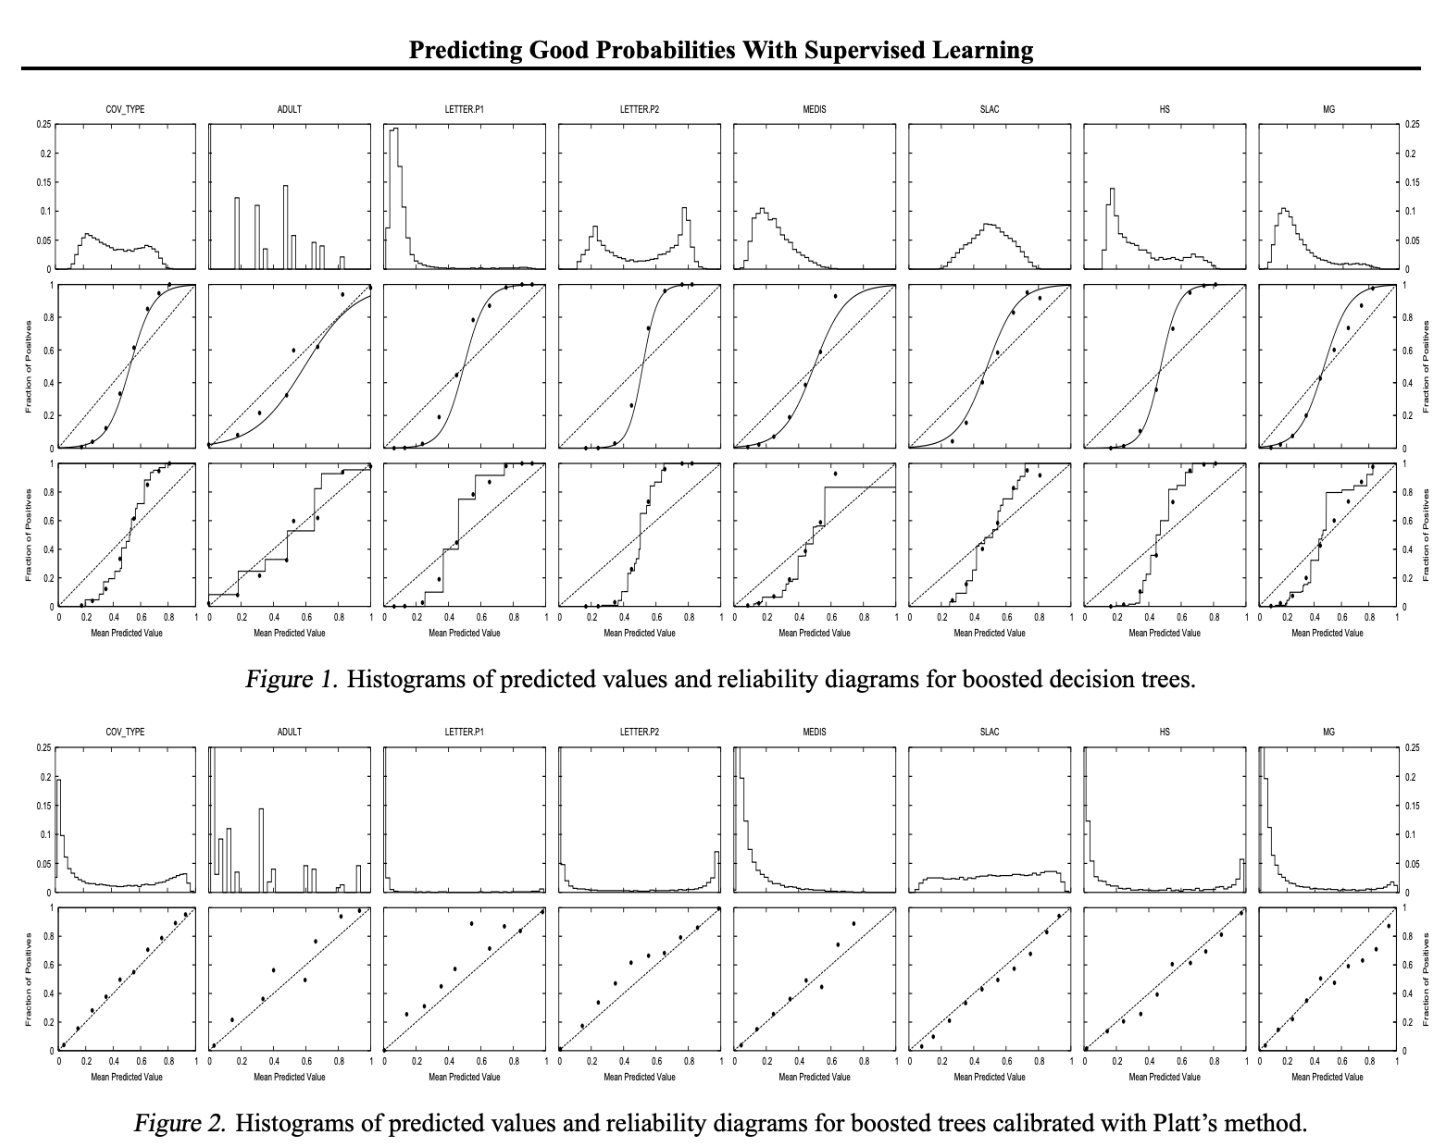

Es importante aplicar una calibración, ya que los modelos de machine learning por lo general poseen sesgos en las distribuciones de salida (intrínsecos), por lo que aplicar modelos de calibración pueden ayudar enormemente en la toma de decisiones de nuestros modelos y en modular nuestros scores.

#### ¿Cuáles son las consecuencias de los modelos mal calibrados?

Intuitivamente, uno quiere tener calibrado para poder interpretar sus probabilidades estimadas como frecuencias a largo plazo. En ese sentido, la pregunta podría ser "¿por qué no querría estar calibrado?". Pero vayamos más allá y señalemos algunas razones prácticas por las que queremos que nuestro modelo esté calibrado:

- **Razón práctica nº 1**: Las probabilidades estimadas permiten flexibilidad
Si está prediciendo si un usuario hará clic en un anuncio con un clasificador, es útil poder clasificar los anuncios por su probabilidad de que se haga clic en ellos. Esto no requiere calibración. Pero si desea calcular el número esperado de clics, necesitará calibrar las probabilidades. Este valor esperado puede ser útil para simular el impacto de un experimento (¿aumenta esto los clics esperados lo suficiente como para justificar la realización de un experimento real?) o puede utilizarse directamente para no publicar anuncios cuyos ingresos esperados no sean superiores a su coste.
- **Razón práctica nº 2**: Modularidad del modelo
En los sistemas complejos de aprendizaje automático, los modelos dependen unos de otros. Los clasificadores individuales son a menudo entradas en sistemas más grandes que toman las decisiones finales.

Para estos sistemas de ML, la calibración simplifica la interacción. La calibración permite que cada modelo se centre en estimar sus probabilidades particulares lo mejor posible. Y como la interpretación es estable, no es necesario que otros componentes del sistema cambien cada vez que cambian los modelos.

<center>
<img src='https://media2.giphy.com/media/l2Je4Ku0Cx292KWv6/200w.gif?cid=6c09b952d09suwi1qla8qqn94d8n1uv453kmb618y7cwswjf&ep=v1_gifs_search&rid=200w.gif&ct=g' width=300 />

**Tipos de calibradores en Sklearn**:

1. **Calibración de regresión isotónica**:
   - **¿Qué hace?**: Ajusta una función isotónica a las probabilidades predichas por el clasificador. Esta función es monótona no decreciente, lo que significa que las probabilidades recalibradas aumentan o permanecen iguales en relación con las probabilidades originales.
   - **Cuándo es útil**: Es útil cuando las probabilidades predichas por el clasificador no son monótonas o no están bien calibradas. Puede ayudar a mejorar la calibración de las probabilidades y hacer que reflejen mejor la probabilidad real de que ocurra un evento.

2. **Calibración de regresión sigmoidal**:
   - **¿Qué hace?**: Ajusta una función sigmoide a las probabilidades predichas por el clasificador. Esta función mapea las probabilidades originales a un rango más amplio, lo que puede mejorar la discriminación entre clases y la calibración de las probabilidades.
   - **Cuándo es útil**: Es útil cuando las probabilidades predichas por el clasificador están mal calibradas o no están bien discriminadas entre las clases. La calibración sigmoidal puede ayudar a mejorar la separación entre clases y hacer que las probabilidades sean más confiables.

3. **Calibración de Bayes**:
   - **¿Qué hace?**: Ajusta una función de calibración basada en la regresión de Bayes, que estima la probabilidad a posteriori de la clase dados los datos. Este enfoque es más robusto y puede adaptarse mejor a diferentes distribuciones de datos.
   - **Cuándo es útil**: Es útil cuando se desconoce la distribución subyacente de los datos o cuando se desea una calibración más robusta que pueda adaptarse mejor a diferentes conjuntos de datos. La calibración de Bayes puede ser especialmente útil en situaciones donde las distribuciones de clase son desiguales o difíciles de modelar con precisión.
   
> Notar 💡: Un artículo muy interesante sobre calibración https://www.unofficialgoogledatascience.com/2021/04/why-model-calibration-matters-and-how.html

>  **Pregunta❓**: ¿Solo puedo usar los de sklearn?

In [67]:
# Obtenemos X para el train para el ejemplo
array_X = tree_pipe['preprocesamiento'].fit_transform(X_train)
cols_trans_name = tree_pipe['preprocesamiento'].get_feature_names_out()
new_X_train = pd.DataFrame(array_X, columns=cols_trans_name)

# Obtenemos X para el test para el ejemplo
array_X = tree_pipe['preprocesamiento'].transform(X_test)
cols_trans_name = tree_pipe['preprocesamiento'].get_feature_names_out()
new_X_test = pd.DataFrame(array_X, columns=cols_trans_name)

# Obtenemos y para el ejemplo
new_y_train = (y_train == 'Adelie')
new_y_test = (y_test == 'Adelie')

In [69]:
from numpy import mean
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.calibration import CalibratedClassifierCV
from sklearn.tree import DecisionTreeClassifier

# Entrenamos primero que todo un modelo
clf = tree_pipe['tree']
clf.fit(new_X_train, y_train)

# Hacemos un Wrap sobre el modelo
calibrated = CalibratedClassifierCV(clf, method='isotonic', cv=3)
# Definimos procedimiento de evaluación
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
# Evaluamos
estimator = cross_validate(
    calibrated, new_X_test, new_y_test, 
    scoring='roc_auc', cv=cv, n_jobs=-1, 
    return_estimator=True
)

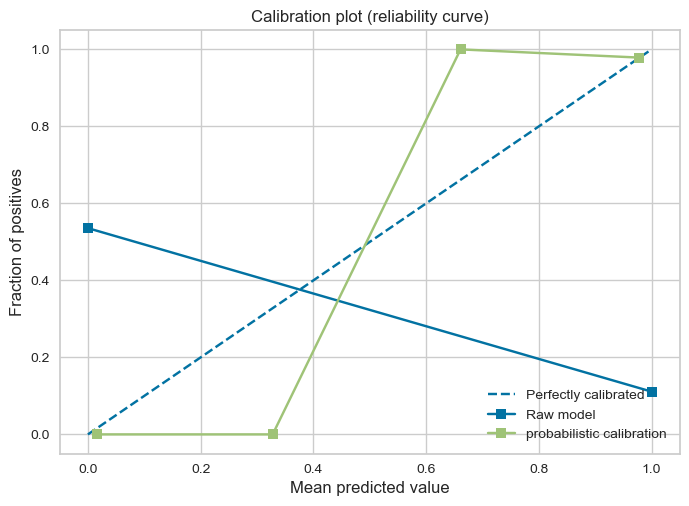

In [70]:
import matplotlib.pyplot as plt
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

# Definimos figura para hacer el plot
fig = plt.figure()
ax = fig.add_subplot()
ax.plot([0, 1], [0, 1], "b--", label="Perfectly calibrated")
ax.set_ylabel("Fraction of positives")
ax.set_xlabel("Mean predicted value")
ax.set_title('Calibration plot (reliability curve)')

# Graficamos el primer modelo raw
prob_pos_dt = clf.predict_proba(new_X_test)[:, 1]
fraction_of_positives_dt, mean_predicted_value_dt = calibration_curve(new_y_test, prob_pos_dt, n_bins=20)
ax.plot(
    mean_predicted_value_dt, 
    fraction_of_positives_dt, "s-", label="%s" % ('Raw model')
)

# Graficamos el modelo calibrado
prob_pos_cc = estimator['estimator'][0].predict_proba(new_X_test)[:, 1]
fraction_of_positives_cc, mean_predicted_value_cc = calibration_curve(new_y_test, prob_pos_cc, n_bins=10)
ax.plot(mean_predicted_value_cc, fraction_of_positives_cc, "s-", label="%s" % ('probabilistic calibration'))

ax.legend(loc="lower right")
plt.show()

**Consideraciones:**

- En general la aplicación de la calibración no produce probabilidades perfectamente calibradas, sino sólo probabilidades mejor calibradas. 
- Sigue siendo una estimación puntual y, por lo tanto, no tiene los atributos esperados de la estimación de la incertidumbre.
- Necesita de un nuevo conjunto de datos llamado calibración.

>  **Pregunta❓**: ¿Existe una alternativa?

Sip, un ejemplo de esto es conformal prediction.

### Discrimiación de Threshold

En el ámbito de los algoritmos de clasificación, nuestro objetivo principal es predecir si una instancia pertenece a una clase u otra dentro de un conjunto de datos. Aunque los algoritmos que utilizamos generalmente ofrecen excelentes resultados, a veces resulta beneficioso reevaluar el umbral (threshold) que determina la clasificación de las instancias.

En situaciones de desequilibrio de clases, es común que muchos modelos sesguen sus probabilidades hacia un extremo de la distribución, como cerca del origen. Este sesgo puede resultar en una baja tasa de casos correctamente identificados, incluso cuando se han seleccionado los mejores estimadores durante el entrenamiento. Esto suele ocurrir porque el umbral predeterminado en muchas bibliotecas de código es generalmente 0.5.

Una solución efectiva para estos problemas es ajustar el umbral. Esto se puede lograr mediante el uso de gráficos de discriminación o la optimización del umbral utilizando técnicas como el método de las g-means.

En cuanto al uso de gráficos de discriminación, este método consiste en evaluar el modelo con varios umbrales para observar cómo afectan al rendimiento del mismo. Las métricas que se analizan incluyen la precisión, la exhaustividad (recall), el puntaje F1 y la tasa de aceptación (queue rate). La elección del umbral adecuado dependerá de la métrica que se desee maximizar o minimizar, según los objetivos específicos del negocio.

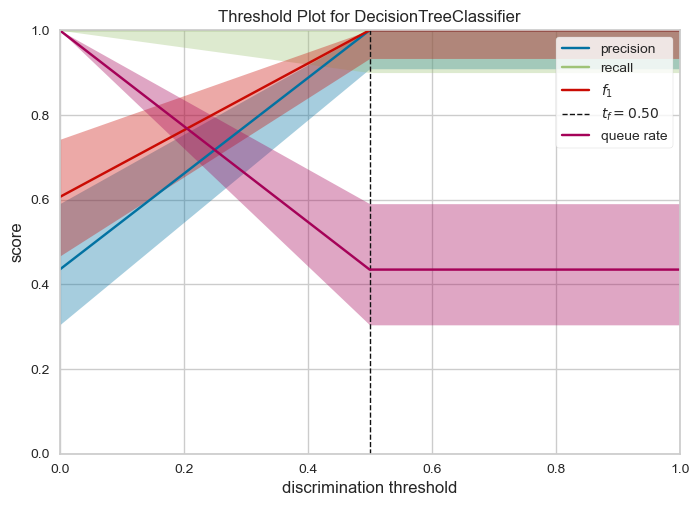

<Axes: title={'center': 'Threshold Plot for DecisionTreeClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [38]:
from yellowbrick.classifier import DiscriminationThreshold

model = tree_pipe['tree']
model.fit(new_X_train, new_y_train)

visualizer = DiscriminationThreshold(model, is_fitted=True)
visualizer.fit(new_X_train, new_y_train)
visualizer.show()

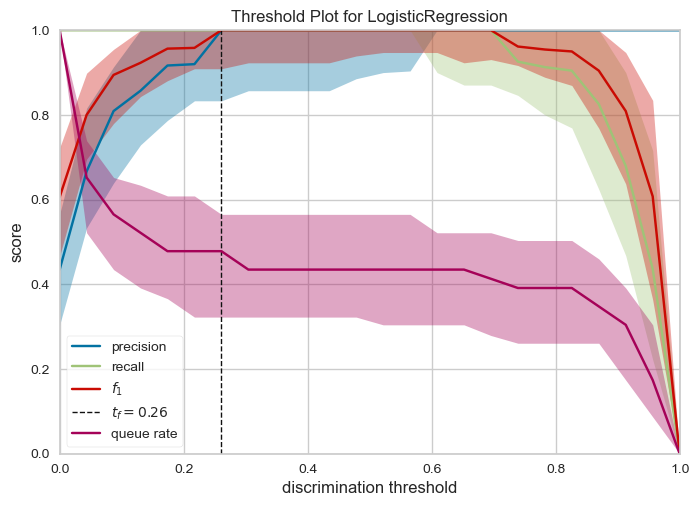

<Axes: title={'center': 'Threshold Plot for LogisticRegression'}, xlabel='discrimination threshold', ylabel='score'>

In [40]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class="auto", solver="liblinear")
model.fit(new_X_train, new_y_train)

visualizer = DiscriminationThreshold(model, is_fitted=True)
visualizer.fit(new_X_train, new_y_train)
visualizer.show()

>  **Pregunta❓**: ¿Otros métodos?

Existen métodos alternativos que buscan optimizar el umbral utilizando la media geométrica; sin embargo, para facilitar la comprensión por parte del cliente, se recomienda optar por la técnica de discriminación por umbral. Esta última ofrece un enfoque más intuitivo y directo, permitiendo ajustar el umbral de manera que se equilibren las métricas de interés. [Threshold Moving for Imbalanced Classification](https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/).

## Selección de Modelos

#### No USEN modelos SOTA (state of the art) 😨

<center>
<img src='https://media4.giphy.com/media/3o6Mb8wQGubBoBSXjq/200w.gif?cid=6c09b952orurxn8c1bhkv4td1v2m812xx2sxq4q3fjsrtohi&ep=v1_gifs_search&rid=200w.gif&ct=g' width=300 />

1. **Costo:** A menudo, los modelos o algoritmos que son líderes en investigación pueden ser costosos de implementar en términos de recursos computacionales o financieros. Esto puede hacer que sean imprácticos o poco realistas para implementar en entornos del mundo real.

2. **Latencia:** La velocidad de procesamiento puede variar entre diferentes modelos. Lo que puede funcionar rápidamente en un entorno de investigación puede no ser tan eficiente cuando se trata de manejar grandes volúmenes de datos en tiempo real o con restricciones de tiempo estrictas.

3. **Éxito probado en la industria:** A veces, un modelo o técnica puede ser altamente efectivo en un entorno de investigación controlado, pero puede no tener el mismo impacto cuando se aplica en el mundo real. Esto puede deberse a diferencias en los conjuntos de datos, las condiciones de operación o las necesidades específicas de la industria.

4. **Apoyo de la comunidad:** La comunidad de investigación puede respaldar un enfoque particular, pero eso no garantiza que sea la mejor opción para su aplicación específica. Es importante considerar cómo se adapta el modelo o la técnica a su caso de uso y si hay una comunidad activa que pueda proporcionar soporte y soluciones a problemas específicos.

#### Escojan el modelo más simple

<center>
<img src='https://media0.giphy.com/media/xT5LMQPcARLvQuknaU/200w.gif?cid=6c09b952r2d86p3qx85fwf3xdrrl4cypise3l7o7awvgjnf8&ep=v1_gifs_search&rid=200w.gif&ct=g' width=300 />

1. **Más fácil de implementar:** Significa que es más sencillo poner en funcionamiento un sistema o aplicación utilizando ciertas técnicas o modelos. En términos de desarrollo de software, esto podría referirse a la facilidad con la que se puede instalar, configurar y hacer funcionar un sistema.

2. **Implementar tempranamente permite validar el proceso:** Indica que al implementar una solución o sistema de manera temprana en el proceso de desarrollo, se pueden identificar y corregir posibles problemas o errores más rápidamente. Esto permite validar si el sistema está cumpliendo con los requisitos y expectativas deseados.

3. **Más fácil de depurar:** Se refiere a la capacidad de identificar y corregir errores o fallos en el sistema de manera más eficiente. Esto puede ser importante durante el proceso de desarrollo y mantenimiento del software para asegurar su correcto funcionamiento.

4. **Más fácil de mejorar:** Significa que es más sencillo realizar ajustes, optimizaciones o agregar nuevas funcionalidades a un sistema o modelo en particular. Esto puede ser crucial para mantener la relevancia y efectividad de la solución a lo largo del tiempo.

5. **Más fácil de explicar:** Esta característica se refiere a la capacidad de un modelo o sistema para ser comprendido y comunicado de manera clara y concisa. Cuando un modelo es fácil de explicar, es más accesible para aquellos que no son expertos en el campo, lo que facilita su adopción y aceptación en entornos donde la comprensión del modelo es importante.

6. **Modelos más simples no son necesariamente aquellos que requieren menos esfuerzo:** Esto destaca que la simplicidad de un modelo no siempre se correlaciona con la cantidad de esfuerzo necesario para desarrollarlo o implementarlo. A veces, modelos más simples pueden requerir un esfuerzo considerable para ser efectivos, mientras que modelos más complejos pueden ser más fáciles de implementar en ciertos casos.

7. **BERT es fácil de comenzar con un modelo preentrenado, pero no es el más simple:** Aquí se menciona un ejemplo específico, BERT, que es un modelo de lenguaje muy utilizado en el procesamiento del lenguaje natural. Aunque es fácil comenzar con BERT utilizando un modelo preentrenado, puede no ser el modelo más simple en términos de implementación y comprensión, debido a su complejidad y sofisticación.

#### Otros puntos relevantes ❗❗❗❗

<center>
<img src='https://i0.wp.com/i.imgur.com/oAy4dC6.gif?w=780&quality=55&strip=all' width=300 />

1. **Evitar sesgos humanos en la selección de modelos:** Este punto se refiere a la necesidad de evitar que los prejuicios o sesgos personales influyan en la elección de modelos para un determinado problema. Es importante seleccionar modelos de manera objetiva, basados en métricas y criterios específicos, en lugar de basarse únicamente en opiniones o preferencias personales que podrían introducir sesgos no deseados en el proceso.

2. **Evaluar el buen rendimiento ahora frente al buen rendimiento más tarde:** Esta idea implica sopesar la calidad del rendimiento de un modelo en el momento presente en comparación con su posible rendimiento futuro. Es posible que un modelo tenga un buen rendimiento en el presente, pero es importante considerar si ese rendimiento se mantendrá o mejorará en el futuro a medida que cambien las condiciones o los datos. Esto puede influir en decisiones como la inversión en el desarrollo o la adopción de un modelo.

3. **Evaluar los compromisos:** Al seleccionar un modelo o tomar decisiones relacionadas con él, es esencial evaluar los compromisos implicados. Esto significa considerar y equilibrar los aspectos positivos y negativos de diferentes opciones. Por ejemplo, un modelo puede tener un rendimiento superior en términos de precisión, pero podría requerir más recursos computacionales o ser más difícil de interpretar. Comprender y evaluar estos compromisos es fundamental para tomar decisiones informadas.

4. **Comprender las suposiciones de tu modelo:** Cada modelo está basado en ciertas suposiciones o limitaciones que pueden afectar su rendimiento y aplicabilidad en diferentes contextos. Es importante comprender estas suposiciones para poder interpretar adecuadamente los resultados del modelo y evitar utilizarlo en situaciones donde esas suposiciones no se cumplan. Esto implica conocer cómo funciona el modelo, qué datos son más adecuados para él y qué condiciones deben cumplirse para que sea efectivo.

#### Guía de Scikit-learn para Elegir el Modelo

<img src='https://github.com/MDS7202/MDS7202/blob/main/recursos/2023-01/18-Aprendizaje-Supervisado-I/ml_map.png?raw=true' />

## Auto-ML

<center>
<img src='https://i.gifer.com/origin/53/534610a486a7e3c27e25b9793ecfdae7_w200.gif' width=300 />

AutoML, o Aprendizaje Automático Automatizado, es un proceso en el que las máquinas se encargan de los pasos involucrados en la construcción de modelos de aprendizaje automático, facilitando a los humanos la creación de modelos poderosos con menos esfuerzo. Automatiza tareas como la ingeniería de características, la selección de algoritmos, la optimización de hiperparámetros, el entrenamiento de modelos y la evaluación de modelos.

Piensa en AutoML como tener un asistente inteligente que se encarga de todo el trabajo complejo involucrado en la construcción de modelos de aprendizaje automático. En lugar de probar manualmente diferentes algoritmos y ajustar parámetros para encontrar el mejor modelo, AutoML lo hace automáticamente. Esto ahorra mucho tiempo y recursos, especialmente para personas que pueden no tener un conocimiento extenso de técnicas de aprendizaje automático.

En resumen, AutoML democratiza el aprendizaje automático al hacerlo más accesible para una variedad más amplia de personas, permitiéndoles aprovechar el poder del aprendizaje automático sin necesidad de ser expertos en el campo.features

<center>
<img src='https://miro.medium.com/v2/resize:fit:1024/1*Cku5-rqmqSIuhUyFkIAdIA.png' width=800 />

In [71]:
from pycaret.datasets import get_data
from pycaret.classification import *
import os

os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"

# Setup PyCaret
clf = setup(df, target='species')

,Description,Value
0,Session id,3272
1,Target,species
2,Target type,Multiclass
3,Target mapping,"Adelie: 0, Chinstrap: 1, Gentoo: 2"
4,Original data shape,"(334, 7)"
5,Transformed data shape,"(334, 11)"
6,Transformed train set shape,"(233, 11)"
7,Transformed test set shape,"(101, 11)"
8,Numeric features,4
9,Categorical features,2


In [72]:
# Comparar un conjunto de modelos
best_model = compare_models(exclude = ['lightgbm'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9957,0.9994,0.9957,0.9960,0.9955,0.9931,0.9934,0.0210
lda,Linear Discriminant Analysis,0.9957,0.0000,0.9957,0.9964,0.9957,0.9933,0.9936,0.0070
ridge,Ridge Classifier,0.9913,0.0000,0.9913,0.9921,0.9910,0.9863,0.9869,0.0080
et,Extra Trees Classifier,0.9913,1.0000,0.9913,0.9924,0.9912,0.9865,0.9870,0.0200
xgboost,Extreme Gradient Boosting,0.9913,0.9994,0.9913,0.9913,0.9913,0.9865,0.9865,0.0130
lr,Logistic Regression,0.9871,0.0000,0.9871,0.9886,0.9870,0.9799,0.9807,0.2930
gbc,Gradient Boosting Classifier,0.9783,0.0000,0.9783,0.9786,0.9778,0.9657,0.9665,0.0220
dt,Decision Tree Classifier,0.9572,0.9664,0.9572,0.9647,0.9547,0.9325,0.9375,0.0080
ada,Ada Boost Classifier,0.9395,0.0000,0.9395,0.9325,0.9300,0.9028,0.9134,0.0120
nb,Naive Bayes,0.8366,0.9988,0.8366,0.9132,0.8378,0.7601,0.7939,0.0080


In [73]:
# Crear un modelo en particular
final_model = create_model('xgboost')

# Evaluar el modelo
evaluate_model(final_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9130,0.9942,0.9130,0.9130,0.9130,0.8647,0.8647
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…